# Learning to Make Predictions on Graphs with Autoencoders.

Setup system paths and modules:

In [1]:
import sys, os

ditk_path = os.path.abspath(os.path.join("../../.."))
if ditk_path not in sys.path:
    sys.path.append(ditk_path)

## Importing modules

In [2]:
from graph.completion.longae.longae import longae
from graph.completion.longae.hparams import hparams as hp

Using TensorFlow backend.


## Evaluation metrics

In [3]:
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.metrics import average_precision_score as ap_score

metrics = {
    "auc_score": auc_score,
    "ap_score": ap_score
}

## Creating longae object

In [4]:
graph_completion = longae()

## Test files

In [5]:
data_dir = os.path.join(ditk_path, 'graph/completion/longae/data/')
files_citeseer = list(map(lambda x: os.path.join(data_dir, x), ['citeseer_x.txt', 'citeseer_y.txt', 'citeseer_graph.txt']))
files_cora = list(map(lambda x: os.path.join(data_dir, x), ['cora_x.txt', 'cora_y.txt', 'cora_graph.txt']))

In [6]:
# set hparam file paths
hp.checkpoint_dir = os.path.join(ditk_path, 'graph/completion/longae/checkpoint/')
hp.index_file = os.path.join(ditk_path, 'graph/completion/longae/data/ind.cora.test.index') # or ind.citeseer.test.index

## Read dataset

In [7]:
train_data, validation_data, test_data = graph_completion.read_dataset(files_cora) # or files_citeseer


Compiling autoencoder model...

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/Users/kevinli/school/csci548/project/ditk/graph/completion/longae/longae.py:39: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  test_inds = np.vstack({tuple(row) for row in test_inds})


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 4141)         0                                            
__________________________________________________________________________________________________
encoded1 (Dense)                (None, 256)          1060352     data[0][0]                       
__________________________________________________________________________________________________
encoded2 (Dense)                (None, 128)          32896       encoded1[0][0]                   
__________________________________________________________________________________________________
drop (Dropout)   

## Train model on training data

In [8]:
training_scores = graph_completion.train(train_data, validation_data)


Fitting autoencoder model...


Epoch 1/51
Learning rate: 0.001000
Shuffling data
Instructions for updating:
Use tf.cast instead.
Shuffling data
Avg. training loss: 0.35840684

Evaluating validation set...

Evaluating model
Val AUC: 0.644929
Val AP: 0.676401
Node Val Acc 0.102000

Epoch 2/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.12156706

Evaluating validation set...

Evaluating model
Val AUC: 0.644151
Val AP: 0.671963
Node Val Acc 0.374000

Epoch 3/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.07872218

Evaluating validation set...

Evaluating model
Val AUC: 0.645332
Val AP: 0.673531
Node Val Acc 0.290000

Epoch 4/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.05941066

Evaluating validation set...

Evaluating model
Val AUC: 0.647435
Val AP: 0.678035
Node Val Acc 0.522000

Epoch 5/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.054093942

Evaluating validation set...

Evaluating model
Val AUC: 0.650573
Val AP: 0

Shuffling data
Avg. training loss: 0.018076027

Evaluating validation set...

Evaluating model
Val AUC: 0.908764
Val AP: 0.907544
Node Val Acc 0.696000

Epoch 44/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.018241836

Evaluating validation set...

Evaluating model
Val AUC: 0.907658
Val AP: 0.905734
Node Val Acc 0.706000

Epoch 45/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.017180873

Evaluating validation set...

Evaluating model
Val AUC: 0.914587
Val AP: 0.910732
Node Val Acc 0.704000

Epoch 46/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.017291792

Evaluating validation set...

Evaluating model
Val AUC: 0.917790
Val AP: 0.912781
Node Val Acc 0.714000

Epoch 47/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.017425051

Evaluating validation set...

Evaluating model
Val AUC: 0.916913
Val AP: 0.912814
Node Val Acc 0.718000

Epoch 48/51
Learning rate: 0.001000
Shuffling data
Avg. training loss: 0.017246965

Evaluat

## Plot results of training

[[0.35840684, 0.12156706, 0.07872218, 0.05941066, 0.054093942, 0.038347855, 0.03225825, 0.032123093, 0.02791953, 0.02625342, 0.026167698, 0.0229402, 0.02450136, 0.022937672, 0.022697695, 0.021341218, 0.022031076, 0.020708997, 0.021087693, 0.020385776, 0.020133255, 0.019858154, 0.019652786, 0.019957967, 0.019312695, 0.019113535, 0.018791512, 0.019752115, 0.01947406, 0.019223372, 0.019158214, 0.018667467, 0.01856185, 0.018689144, 0.018262042, 0.01813445, 0.018585814, 0.01774496, 0.017903803, 0.018019883, 0.017836563, 0.017792158, 0.018076027, 0.018241836, 0.017180873, 0.017291792, 0.017425051, 0.017246965, 0.017158424, 0.017208656, 0.017465826], [0.6449285994620655, 0.6441513129705576, 0.6453323203554544, 0.6474346395227002, 0.6505730406259339, 0.6521627197735922, 0.6553353268834007, 0.6589292079689193, 0.6628971047315908, 0.6676265352195846, 0.6724909894177418, 0.6774085529418965, 0.6839274976685906, 0.6899288515063244, 0.6935461367016048, 0.6996001497863025, 0.7045618210557774, 0.71336

Text(0.5, 1.0, 'node accuracy')

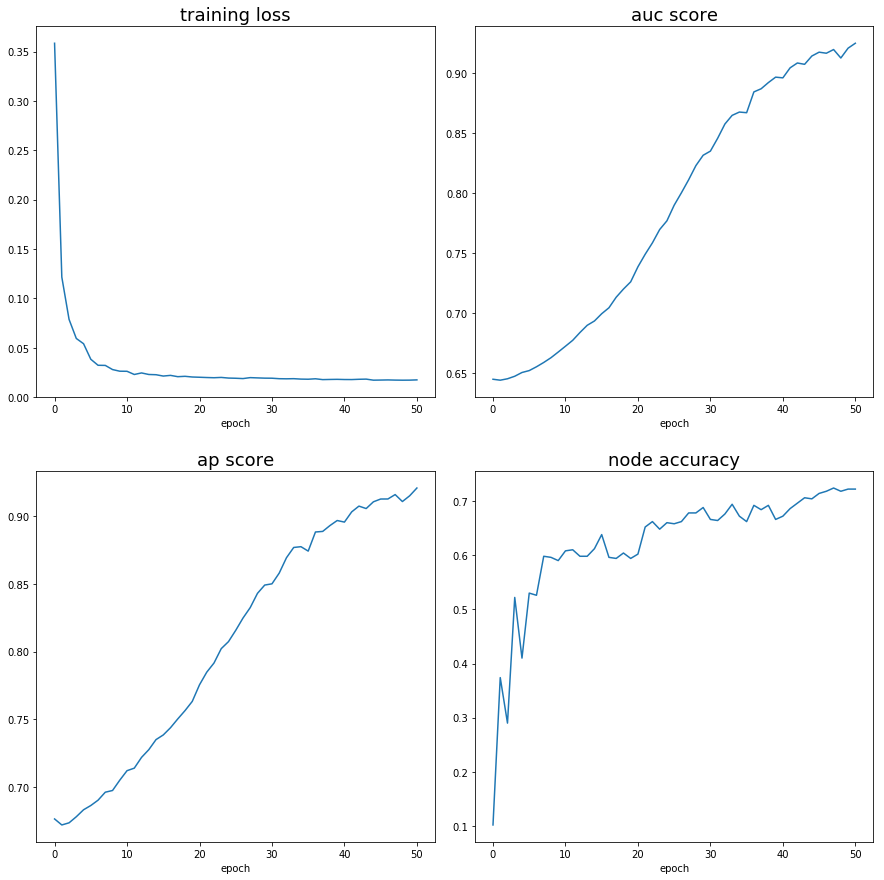

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
ax1.plot(training_scores[0])
ax1.set_xlabel('epoch')
ax1.set_title("training loss", fontsize=18)
ax2.plot(training_scores[1])
ax2.set_xlabel('epoch')
ax2.set_title("auc score", fontsize=18)
ax3.plot(training_scores[2])
ax3.set_xlabel('epoch')
ax3.set_title("ap score", fontsize=18)
ax4.plot(training_scores[3])
ax4.set_xlabel('epoch')
ax4.set_title("node accuracy", fontsize=18)
